In [1]:
using Random, Distributions, Statistics, Plots
gr() 

Plots.GRBackend()

In [7]:
#maqモデル
function extract_y_t(y_t_array,k)
    if k <= length(y_t_array)
        return y_t_array[(length(y_t_array)+1-k)]
    else
        return 0
    end
end

function ar_q(y_0, c, sigma, theta_array, y_length)
    y_t_array = []
    noise_array = rand(Normal(0,sigma) , y_length)
    for i in 1:y_length
        if i == 0
            append!(y_t_array,y_0)
        else
            y_t = 0
            for j in 1:length(theta_array)
                y_t += theta_array[j]*extract_y_t(y_t_array,j)
            end
            append!(y_t_array,c+y_t+noise_array[i])
        end
    end
    return y_t_array
end
            

#k次の自己共分散の値を計算
function autocovariance(k, ma1_array)
    auto_cov = Statistics.cov(ma1_array[1:(size(ma1_array)[1])-k],ma1_array[1+k:(size(ma1_array)[1])],corrected = false)
    return auto_cov
end

#k次の自己相関の値を計算
function autocorrelation(k, ma1_array)
    k_0 = autocovariance(0, ma1_array)
    k_k = autocovariance(k, ma1_array)
    return k_k/k_0
end

#OLSで推定
function OLS_for_AR1(ar_proc)
    mean_y_t = mean(ar_proc[2:length(ar_proc)])
    mean_y_t_1 = mean(ar_proc[1:(length(ar_proc)-1)])
    phi = sum([(ar_proc[i]-mean_y_t)*(ar_proc[i-1]-mean_y_t_1)  for i in 2:(length(ar_proc))])/sum([(ar_proc[i-1]-mean_y_t_1)^2  for i in 2:(length(ar_proc))])
    c = mean_y_t - phi*mean_y_t_1
    s = sum([(ar_proc[i]-c-phi*ar_proc[i-1])^2  for i in 2:(length(ar_proc))])/(length(ar_proc)-3)
    return phi,c,s
end

#最尤法で推定
function Likelihood_for_AR1(ar_proc)
    mean_y_t = mean(ar_proc[2:length(ar_proc)])
    mean_y_t_1 = mean(ar_proc[1:(length(ar_proc)-1)])
    phi = sum([(ar_proc[i]-mean_y_t)*(ar_proc[i-1]-mean_y_t_1)  for i in 2:(length(ar_proc))])/sum([(ar_proc[i-1]-mean_y_t_1)^2  for i in 2:(length(ar_proc))])
    c = mean_y_t - phi*mean_y_t_1
    s = sum([(ar_proc[i]-c-phi*ar_proc[i-1])^2  for i in 2:(length(ar_proc))])/(length(ar_proc)-1)
    return phi,c,s
end

Likelihood_for_AR1 (generic function with 1 method)

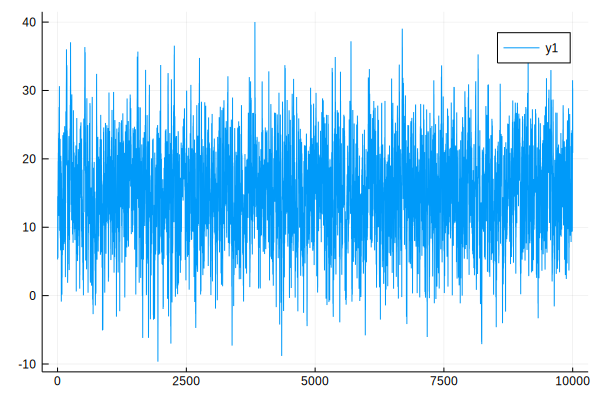

In [8]:
ar_1 = ar_q(0, 3, 4, [0.8], 10001)
plot(ar_1)

In [15]:
print("true params phi:0.8,c:3,sigma^2:4^2\n")
for i in [10,30,50,100,1000,10000,100000]
    print("if length = $i \n")
    ar_1 = ar_q(0, 3, 4, [0.8], i)
    estimated_ols = OLS_for_AR1(ar_1)
    estimated_likelihood = Likelihood_for_AR1(ar_1)
    print("OLS : ")
    print("phi_hat : $(estimated_ols[1]),  c_hat : $(estimated_ols[2]),  sigma_hat : $(estimated_ols[3])\n")
    print("Likelihood : ")
    print("phi_hat : $(estimated_likelihood[1]),  c_hat : $(estimated_likelihood[2]),  sigma_hat : $(estimated_likelihood[3])\n")
end

true params phi:0.8,c:3,sigma^2:4^2
if length = 10 
OLS : phi_hat : 0.26661472747402265,  c_hat : 5.638561648924802,  sigma_hat : 10.967095514576679
Likelihood : phi_hat : 0.26661472747402265,  c_hat : 5.638561648924802,  sigma_hat : 8.529963178004083
if length = 30 
OLS : phi_hat : 0.7014358346098685,  c_hat : 5.4390364427024025,  sigma_hat : 24.41022566911466
Likelihood : phi_hat : 0.7014358346098685,  c_hat : 5.4390364427024025,  sigma_hat : 22.726761829865374
if length = 50 
OLS : phi_hat : 0.7597150128038467,  c_hat : 4.662848828352114,  sigma_hat : 8.883743027806627
Likelihood : phi_hat : 0.7597150128038467,  c_hat : 4.662848828352114,  sigma_hat : 8.521141271569622
if length = 100 
OLS : phi_hat : 0.7277609491492294,  c_hat : 4.442616393628496,  sigma_hat : 16.667855491723966
Likelihood : phi_hat : 0.7277609491492294,  c_hat : 4.442616393628496,  sigma_hat : 16.331131138355804
if length = 1000 
OLS : phi_hat : 0.8207213516885518,  c_hat : 2.629221692875749,  sigma_hat : 16.27453